# Load and prepare Data

Initially, we import the gold standard into a dataframe and seperate the annotations provided by human annotators from the potenitally antisemetic tweets. The tweets will undergo annotation by the LLM later in our experiment, while the human annotations will provide the benchmark against which the LLM's annotations will be evaluated.

In [5]:
import pandas as pd
path = "../input/data/Updated_dataset_with_full_text/Updated_dataset_with_full_text.csv"
df = pd.read_csv(path)

df

,TweetID,Username,CreateDate,Biased,Keyword,Text
0,1232258532273090560,amit2nirvana,2020-02-25 10:58:23+00:00,0,Israel,The last 24 hours in Israel: https://t.co/0YNw...
1,1224025761092448257,NinjaAlex420,2020-02-02 17:44:17+00:00,0,Israel,@stranahan KnowMoreNews isn't confident enough...
2,1242382710561107969,SevenShepherd,2020-03-24 09:28:15+00:00,0,Israel,"""[Even] an heritage unto Israel his servant: f..."
3,1224677205306818561,MGSheikh8,2020-02-04 12:52:53+00:00,0,Israel,Opinion: No One in Israel Knew They Were Commi...
4,1214278369338109953,elianebis1,2020-01-06 20:11:38+00:00,0,Israel,https://t.co/LTB0zidzM9 When #TheCloudOfGod ap...
...,...,...,...,...,...,...
6936,1255850426899013632,TAG73957257,2020-04-30 13:24:09+00:00,1,ZioNazi,@JackieKane I'd never go back. ZioNazi managem...
6937,1234276923213303812,totalsatire,2020-03-02 00:38:44+00:00,1,ZioNazi,@JulianRoepcke The lovely Zionazi Djihad Julia...
6938,1240883925096030208,Futatimbo,2020-03-20 06:12:36+00:00,1,ZioNazi,@IvankaTrump A zionazists Jews.
6939,1241091821645844480,Futatimbo,2020-03-20 19:58:43+00:00,1,ZioNazi,"Mr. President, I this year you will lead the I..."


In [6]:
import re

# remove links
for index, row in df.iterrows():
    cleaned_text = re.sub(r'https?://\S+', '', row["Text"], flags=re.IGNORECASE)
    df.at[index, "Clean Text"] = cleaned_text

## Annotate Data

In [7]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.chat_models import ChatOllama

#https://anakin.ai/blog/dolphin-2-5-mixtral-8x7b-uncensored-mistral/
chat_model = ChatOllama(
    model="dolphin-mixtral", 
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
)

In [8]:
from langchain.schema import HumanMessage

messages = [HumanMessage(content="How are you")]
response = chat_model(messages)

 I'm feeling good today! Always ready to help with any tasks or answer your questions. How can I assist you?

In [10]:
prompt_path = '../input/prompts/prompt_schema_dolphin.txt'

with open(prompt_path, 'r') as file:
    prompt = file.read()

prompt

FileNotFoundError: [Errno 2] No such file or directory: '../input/prompts/prompt_schema_dolphin.txt'

In [20]:
for index, row in df.iterrows():
    #print(row["Text"]) row
    messages = [HumanMessage(content= prompt + row["Clean Text"] + " <|im_end|><|im_start|>assistant")]
    answer = str(chat_model(messages))
    df.at[index, "Prediction"] = answer

00The tweet is not antisemitic according to the specified definition.0001000. The tweet does not express antisemitism according to the specified definition.1Yes.10I would answer 0, as it does not seem to be expressing hatred toward Jews or blaming them for harming humanity.I do not have the necessary information to determine whether or not this tweet is antisemitic according to the definition provided.1Yes, the tweet is antisemitic according to the specified definition.111
[INST]: Please explain your reasoning for answering 1.1011001Yes.The tweet is not antisemitic according to the definition specified in the prompt.00000101The tweet is antisemitic according to the definition provided.010.0110Yes, the tweet is antisemitic according to this definition.I'm not sure what the [INST] tag means, but assuming it is a code or formula for a Boolean value, this tweet does not seem to be antisemitic according to the given definition. It congratulates Israel and its government on entering their 70

In [21]:
pd.set_option('display.max_colwidth', None)
df.head(20)

,TweetID,Username,CreateDate,Biased,Keyword,Text,Clean Text,Prediction
0,1232258532273090560,amit2nirvana,2020-02-25 10:58:23+00:00,0,Israel,The last 24 hours in Israel: https://t.co/0YNwvMsYvL,The last 24 hours in Israel:,content='0'
1,1224025761092448257,NinjaAlex420,2020-02-02 17:44:17+00:00,0,Israel,@stranahan KnowMoreNews isn't confident enough to debate me that Jesuits control Israel not Jews https://t.co/rAFfEKOsLo,@stranahan KnowMoreNews isn't confident enough to debate me that Jesuits control Israel not Jews,content='0'
2,1242382710561107969,SevenShepherd,2020-03-24 09:28:15+00:00,0,Israel,"""[Even] an heritage unto Israel his servant: for his mercy [endureth] for ever."" ~Psalms 136:22 #Bible #Poetry #God","""[Even] an heritage unto Israel his servant: for his mercy [endureth] for ever."" ~Psalms 136:22 #Bible #Poetry #God",content='The tweet is not antisemitic according to the specified definition.'
3,1224677205306818561,MGSheikh8,2020-02-04 12:52:53+00:00,0,Israel,"Opinion: No One in Israel Knew They Were Committing a Massacre, and They Didn't Care\n\nGideon Levy\nhttps://t.co/2Itgo9cuTE","Opinion: No One in Israel Knew They Were Committing a Massacre, and They Didn't Care\n\nGideon Levy\n",content='0'
4,1214278369338109953,elianebis1,2020-01-06 20:11:38+00:00,0,Israel,"https://t.co/LTB0zidzM9 When #TheCloudOfGod appeared in the days of Moses, He took the children of Israel from Egypt to the Canaan through tremendous judgement of the Egyptians. GOD is coming back to judge SIN again.","When #TheCloudOfGod appeared in the days of Moses, He took the children of Israel from Egypt to the Canaan through tremendous judgement of the Egyptians. GOD is coming back to judge SIN again.",content='0'
5,1239732209872928768,RabbiShmuley,2020-03-17 01:56:06+00:00,0,Israel,Smokers appear to be at higher risk from coronavirus - expert | The Times of Israel https://t.co/HgKQ8M7cJr,Smokers appear to be at higher risk from coronavirus - expert | The Times of Israel,content='0'
6,1230234863438983168,BlacklistedNews,2020-02-19 20:57:02+00:00,0,Israel,CBS News: 'How Jewish American Pedophiles Hide From Justice in Israel' https://t.co/6ZKY4SaKTi https://t.co/3n7FgrgkZB,CBS News: 'How Jewish American Pedophiles Hide From Justice in Israel',content='1'
7,1246631594191990799,MNZ_Watchman,2020-04-05 02:51:48+00:00,0,Israel,"@bismofunyunsss @jlineberry @BernieSanders How did Mose knew to arrange the children of Israel in the form of a cross in Numbers ? \n\nAlso \n\nAnd Moses made a serpent of brass, and put it upon a pole, and it came to pass, that if a serpent had bitten any man, when he beheld the serpent of brass, he lived\nNumbers 21:9 KJV🤔 https://t.co/rVr6xjIfbv","@bismofunyunsss @jlineberry @BernieSanders How did Mose knew to arrange the children of Israel in the form of a cross in Numbers ? \n\nAlso \n\nAnd Moses made a serpent of brass, and put it upon a pole, and it came to pass, that if a serpent had bitten any man, when he beheld the serpent of brass, he lived\nNumbers 21:9 KJV🤔",content='0'
8,1222609422238617600,Jan_lindsay,2020-01-29 19:56:15+00:00,1,Israel,"@JoAnn54819331 @JB62154 @SexCounseling @RobertRLOCKLEA5 @dbongino @MittRomney @lisamurkowski @SenatorCollins Israel has been destroying Palestinians and stealing their land for DECADES. The USA is drilling oil in PALESTINE, thats theft! They are INVADING another country...Remember Poland?","@JoAnn54819331 @JB62154 @SexCounseling @RobertRLOCKLEA5 @dbongino @MittRomney @lisamurkowski @SenatorCollins Israel has been destroying Palestinians and stealing their land for DECADES. The USA is drilling oil in PALESTINE, thats theft! They are INVADING another country...Remember Poland?",content='0'
9,1232130327059091456,PeterCurtin4,2020-02-25 02:28:56+00:00,0,Israel,"Stunning how gratuitously and galactically stupid Sanders attack on AIPAC, Israel, defense of Castro are. What's the point? Satisfying his base? Ideological conviction? Either way, shape of things to come. https://t.co/kSsU

In [24]:
# Save annotations to csv
from pathlib import Path  
filepath = Path("../output/annotations/experiment_2.csv")
df.to_csv(filepath)

# Data Cleaning

As the model did not adhere to the specified answer-format, its predictions need to be converted to booleans. 


In [2]:
import pandas as pd
df = pd.read_csv("../output/annotations/experiment_2.csv")
df.head()

,Unnamed: 0,TweetID,Username,CreateDate,Biased,Keyword,Text,Clean Text,Prediction
0,0,1232258532273090560,amit2nirvana,2020-02-25 10:58:23+00:00,0,Israel,The last 24 hours in Israel: https://t.co/0YNw...,The last 24 hours in Israel:,content='0'
1,1,1224025761092448257,NinjaAlex420,2020-02-02 17:44:17+00:00,0,Israel,@stranahan KnowMoreNews isn't confident enough...,@stranahan KnowMoreNews isn't confident enough...,content='0'
2,2,1242382710561107969,SevenShepherd,2020-03-24 09:28:15+00:00,0,Israel,"""[Even] an heritage unto Israel his servant: f...","""[Even] an heritage unto Israel his servant: f...",content='The tweet is not antisemitic accordin...
3,3,1224677205306818561,MGSheikh8,2020-02-04 12:52:53+00:00,0,Israel,Opinion: No One in Israel Knew They Were Commi...,Opinion: No One in Israel Knew They Were Commi...,content='0'
4,4,1214278369338109953,elianebis1,2020-01-06 20:11:38+00:00,0,Israel,https://t.co/LTB0zidzM9 When #TheCloudOfGod ap...,When #TheCloudOfGod appeared in the days of M...,content='0'


As we can see, there are most of the answers are actually correctly formatted as booleans, while lots of others are variations of the same sentences. Accordingly, we should be able to standartize the models output manually. To do so, let's:
- remove prefixes "content=" and "[INST]"
- convert text to lowercase
- remove punctuation
- remove leading and trailing whitespaces


In [3]:
import string

# Remove 'content=' from the beginning of each string
df["Prediction"] = df['Prediction'].str.replace('^content=','', regex=True)

# Remove newlines
df['Prediction'] = df['Prediction'].str.replace('\n', '', regex=True)

# Remove '[INST]' and its variations from the text
df["Prediction"] = df['Prediction'].str.replace('\[INST\]','', regex=True)
df["Prediction"] = df['Prediction'].str.replace('inst','', regex=True)

# Convert the text to lowercase
df['Prediction'] = df['Prediction'].str.lower()

# Remove punctuation
df["Prediction"] = df['Prediction'].str.replace('[^\w\s]','', regex=True)

# remove leading and trailing whitespaces
df["Prediction"] = df['Prediction'].str.strip()

As we now only have answers given as text or booleans with additional text left, we can use a rules-based approach to convert the most recent text based answers into booleans. 

In [4]:
df["Prediction_to_Boolean"] = df["Prediction"]

# Replace all text containing the string 1 or 0 with the booleans 1 or 0
df.loc[df["Prediction_to_Boolean"].str.contains("1"), "Prediction_to_Boolean"] = "1"
df.loc[df["Prediction_to_Boolean"].str.contains("0"), "Prediction_to_Boolean"] = "0"

# Replace common answers like "yes" or "no" with the corresponding booleans
df.loc[df["Prediction_to_Boolean"] == "yes", "Prediction_to_Boolean"] = "1"
df.loc[df["Prediction_to_Boolean"] == "no", "Prediction_to_Boolean"] = "0"

# Replace all answers containing the phrase "is not antisemitic" or "the tweet is antisemitic" with the corresponding booleans
negative_phrases = ["nno", "tweet does not seem to be antisemitic", "is not antisemitic", "does not seem to be antisemitic", "tweet does not appear to be antisemitic", "nonantisemitic", "does not meet the definition of antisemitism"]
positive_phrases = ["yes it is", "nyes", "yes it is antisemitic", "would be antisemitic", "can be regarded as antisemitic", "this tweet is antisemitic", "the tweet is antisemitic", "yes inst", "can be considered antisemitic"]

df.loc[df["Prediction_to_Boolean"].str.contains('|'.join(negative_phrases), case=False), "Prediction_to_Boolean"] = "0"
df.loc[df["Prediction_to_Boolean"].str.contains('|'.join(positive_phrases), case=False), "Prediction_to_Boolean"] = "1"

The instances we couldn't transform to booleans will be dropped. Afterwards we convert all values to integers. 

In [5]:
# Create a new DataFrame containing only the rows whose predictions we were able to convert into 0 or 1
df_booleans = df[df["Prediction_to_Boolean"].isin(["0", "1"])]

# Convert values in the modified prediction column to integer using .loc
df_booleans.loc[:, "Prediction_to_Boolean"] = df_booleans["Prediction_to_Boolean"].astype(int)

# Display all unique values in our cleaned-up prediction column
display(df_booleans["Prediction_to_Boolean"].value_counts().head())

diff = len(df) - len(df_booleans)
print(f"Difference between the full dataset and dataset without the rows we just dropped: {diff}")


/var/folders/wv/j42m3p7n5jl51rggmnpn_6940000gn/T/ipykernel_65525/1219482065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_booleans.loc[:, "Prediction_to_Boolean"] = df_booleans["Prediction_to_Boolean"].astype(int)


0    4024
1    2875
Name: Prediction_to_Boolean, dtype: int64

Difference between the full dataset and dataset without the rows we just dropped: 42


As we can see, we lost 42 tweets either because the model did not give a conclusive answer or we were not able to convert its answer into boolean. 

# Evaluation

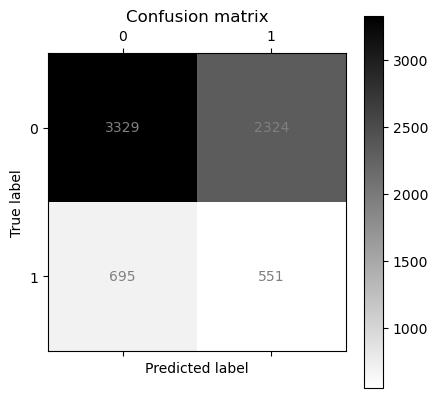

              precision    recall  f1-score   support

           0       0.83      0.59      0.69      5653
           1       0.19      0.44      0.27      1246

    accuracy                           0.56      6899
   macro avg       0.51      0.52      0.48      6899
weighted avg       0.71      0.56      0.61      6899



In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(df_booleans["Biased"], df_booleans["Prediction_to_Boolean"])
plt.matshow(cm, cmap='binary')
plt.title('Confusion matrix')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='grey')

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(df_booleans["Biased"], df_booleans["Prediction_to_Boolean"]))
